In [1]:
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.datasets import mnist

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
Total params: 3,840
Trainable params: 3,840
Non-trainable params: 0
_________________________________________________________________


In [8]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

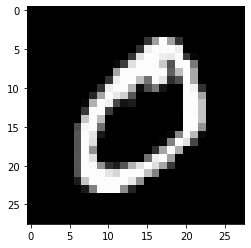

In [10]:
import matplotlib.pyplot as plt

plt.imshow(X_train[1], cmap='gray')

In [15]:
input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# min max scaling
X_train /= 255
X_test /= 255

In [16]:
X_train.max()

1.0

In [17]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [18]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
# initialize
model = Sequential()
# input layer + hidden layer 1
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
# hidden layer 2
model.add(Dense(64, activation='relu'))
# hidden layer 3
model.add(Dense(output_dim, activation='softmax')) # for binary - sigmoid

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 1.8567 - accuracy: 0.4315 - val_loss: 0.6941 - val_accuracy: 0.8329
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6248 - accuracy: 0.8417 - val_loss: 0.4299 - val_accuracy: 0.8851
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4269 - accuracy: 0.8840 - val_loss: 0.3576 - val_accuracy: 0.9000
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3695 - accuracy: 0.8958 - val_loss: 0.3242 - val_accuracy: 0.9060
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3362 - accuracy: 0.9023 - val_loss: 0.3022 - val_accuracy: 0.9145
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3139 - accuracy: 0.9096 - val_loss: 0.2857 - val_accuracy: 0.9187
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2922 - accuracy: 0.9158 - val_loss: 0.2722 - val_accuracy: 0.9222
Epoch 

In [23]:
model.predict(X_test)[1]

array([3.5447453e-04, 3.5518548e-04, 9.8151970e-01, 1.1582479e-02,
       1.0563621e-08, 3.6385218e-03, 2.3436097e-03, 3.4607130e-08,
       2.0580509e-04, 7.5616889e-08], dtype=float32)

In [24]:
y_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)